# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score,plot_confusion_matrix
import matplotlib.pyplot as plt

# Importing csv into python as a dataset

In [2]:
df = pd.read_csv(r'preprocessed_data.csv')

In [3]:
df.head()

,Unnamed: 0,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,applicant_ethnicity,applicant_race,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,0.666667,0.0,0.0,0.0,0.000684,1.0,0.046455,0.333333,0.666667,...,0.002269,0.166896,0.439306,0.397896,0.488987,0.081214,0.193878,0.696988,0.0,1.0
1,1,0.000000,0.0,1.0,0.0,0.001755,1.0,0.904645,0.000000,0.666667,...,0.005524,0.155327,0.154535,0.344194,1.000000,0.184556,0.154676,0.377689,0.0,0.0
2,2,0.333333,0.0,1.0,0.0,0.001606,1.0,0.041565,0.333333,0.666667,...,0.006510,0.163957,0.610621,0.464298,1.000000,0.086232,0.076861,0.877382,0.0,1.0
3,3,0.000000,0.0,0.0,0.0,0.001527,0.0,0.748166,0.333333,0.666667,...,0.010258,0.179408,0.057427,0.564121,1.000000,0.230524,0.168698,0.904733,1.0,1.0
4,4,0.000000,0.0,0.0,0.0,0.003014,1.0,0.061125,0.333333,0.333333,...,0.006905,0.181161,1.000000,0.421054,0.814620,0.166534,0.135516,0.044407,0.0,1.0


# Converting the dataset to input and output numpy arrays

In [4]:
y = df['accepted'].to_numpy()
X = df.drop('accepted',axis=1, inplace=False).values

# Splitting the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,shuffle=True)

In [6]:
xgb = XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', 
              learning_rate=0.23, max_delta_step=1, max_depth=9,
              min_child_weight=1, 
              n_estimators=100, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0.3,
              reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              validate_parameters=False, verbosity=0)

In [7]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.23, max_delta_step=1, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0.3,
              reg_lambda=0.5, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=0)

In [8]:
y_pred = xgb.predict(X_test)

# Testing accuracy

### 1. Accuracy score

In [9]:
accuracy_score(y_test,y_pred)

0.717872

### 2. F1_score

In [10]:
print(f1_score(y_test,y_pred))

0.7358826877565082


### 3. ROC

In [11]:
lr_auc = roc_auc_score(y_test, y_pred)
print(lr_auc)

0.7176368179571143


### 4. AUC 

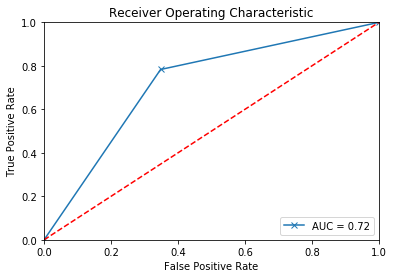

In [12]:
fpr,tpr,_=roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, marker='x', label = 'AUC = %0.2f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. Confusion Matrix

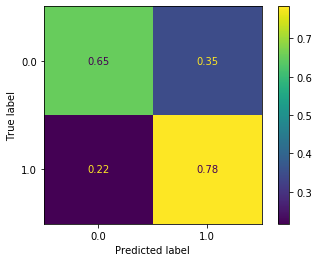

In [13]:
plot_confusion_matrix(xgb, X_test, y_test,normalize='true')
plt.show()